In [1]:
import torch
from datasets.BavarianCrops_Dataset import BavarianCropsDataset
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import scipy.signal as signal
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
DATA_ROOT = "S:/PhD Data/BavarianCrops"
CLASS_MAP = "S:/PhD Data/BavarianCrops/classmapping12.csv"
cropdata = BavarianCropsDataset(
    root = DATA_ROOT,
    region = "holl",
    partition = "train",
    classmapping = CLASS_MAP,
    samplet = None, 
    scheme = "random",
    mode = "traintest",
    seed = 10
)

Initializing BavarianCropsDataset train partition in holl
read 12 classes
precached dataset files found at S:/PhD Data/BavarianCrops\npy\classmapping12.csv\random\holl\train
Loaded cached set
loaded 27288 samples
Dataset S:/PhD Data/BavarianCrops. region holl. partition train. X:27288x(71, 13), y:(27288,) with 12 classes


In [3]:
numberClasses = cropdata.nclasses
print("Number Classes: ", numberClasses, "\n")


# For each class index, make a entry in crop strore
cropStore = {}
for i in range(cropdata.nclasses):
    cropStore[i] = []



# For each class index
for i in range(cropdata.nclasses):
    # Find locations in crop data where this is the index 
    classindex = np.where(cropdata.y == i + 1)[0]


    # Get data at those indices 
    for indx in classindex:
        x, y, id = cropdata[indx]
        # Save them to crop store
        cropStore[i].append(x)



# So at this point, each list in cropstore should be a list of temporal profiles for that class

Number Classes:  12 



In [4]:
# We need to get class names, earlier we stored the location of a class map csv

loadedclasses = pd.read_csv(CLASS_MAP, index_col=0).sort_values(by="id")
print(loadedclasses)
print(cropStore[1][0].shape)

    id  nutzcode         classname      klassenname  gafcode
1    0        54            fallow    Stilllegungen        1
8    0       560            fallow    Stilllegungen        2
7    0        66            fallow    Stilllegungen        2
6    0        65            fallow    Stilllegungen        2
9    0       590            fallow    Stilllegungen        2
4    0       591            fallow    Stilllegungen        1
3    0        62            fallow    Stilllegungen        1
2    0        56            fallow    Stilllegungen        1
5    0        58            fallow    Stilllegungen        1
20   1       441         grassland           Gräser        4
54   1       460         grassland           Gräser       19
53   1       455         grassland           Gräser       19
52   1       454         grassland           Gräser       19
51   1       453         grassland           Gräser       19
49   1       452         grassland           Gräser       18
48   1       451        

fallow
grassland
winter wheat
corn
summer wheat
winter spelt
winter rye
winter barley
summer barley
summer oat
winter triticale
rapeseed
 No data for:  11


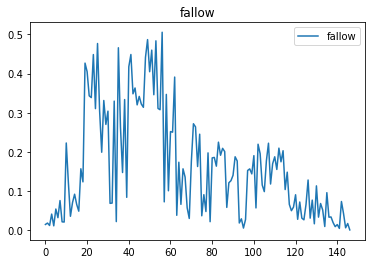

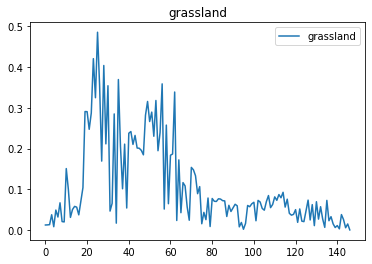

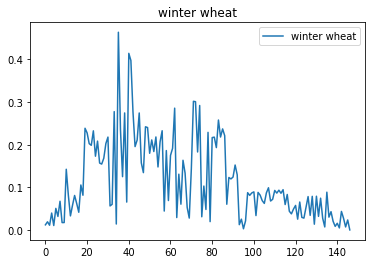

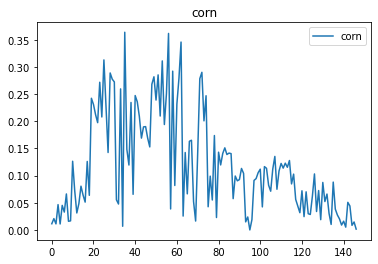

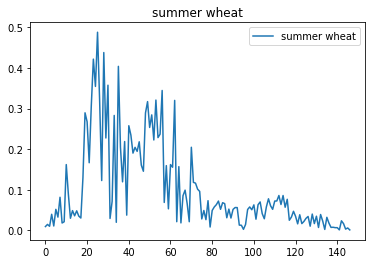

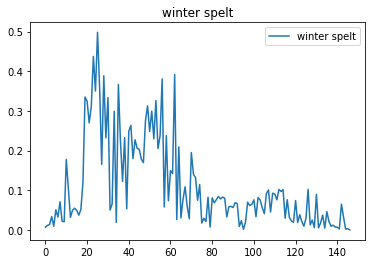

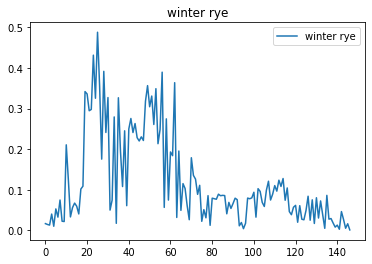

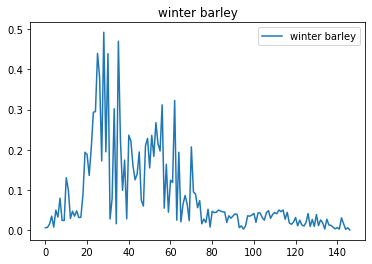

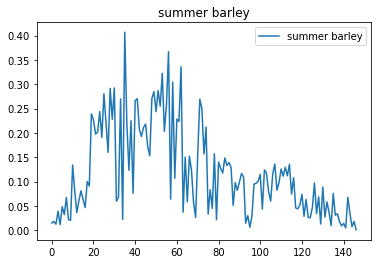

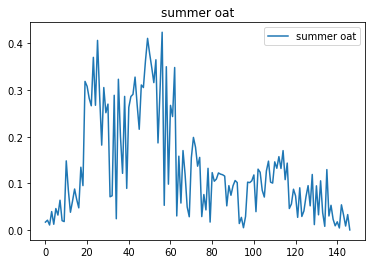

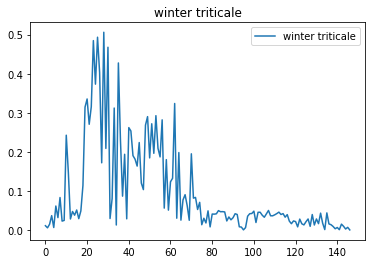

In [5]:
# Make subplots for all land classes



processedProfiles = []




for i in range(numberClasses):
    
    cropProfiles = cropStore[i]
    cropName     = loadedclasses.loc[loadedclasses['id'] == i]
    cropName     = cropName['classname'].values[0]
    print(cropName)
    smoothedNDVI = []
    rawNDVI      = []
    # For all profiles, work out NDVI
    
    
    
    
    
    for profiles in cropProfiles:

        
        
        b8   = profiles[:, 10].numpy()
        b4   = profiles[:,  6].numpy()
        ndvi = (b8 - b4) / (b8 + b4)
        ndviSeries = pd.Series(ndvi)
        #print(ndviSeries)
        
        # We could smooth? -- THIS BREAKS NOTEBOOK FOR SOME REASON, MAYBE BECAUSE OF PADDING?
        #smoothed = signal.savgol_filter(ndviSeries.values, 11, 3)
        #print(smoothed)
        #smoothedNDVI.append(smoothed)
        
        
        rawNDVI.append(ndviSeries)
    
    
    
    if(len(rawNDVI) > 0):
        # Now average the pandas series?
        concatndvi = pd.concat(rawNDVI, axis = 1)
        # average
        averagendvi = concatndvi.mean( axis = 1)
        # print(averagendvi)

        # Average might be borked as time series gets longer? There are less frames contributing at each step.

        #ax.plot(concatFrames.mean( axis = 1), label = landCoverDefinitions[landClass], color = colour )
        #ax.set_title(landCoverDefinitions[landClass] )


        smoothed = signal.savgol_filter(averagendvi.values, 15, 3)

#         fig, axes = plt.subplots()
#         axes.plot(averagendvi, alpha = 0.4)
#         axes.plot(smoothed)
#         axes.set_title("RAW / SMOOTH NDVI FOR " + str(len(cropProfiles)) + " " + cropName)



        processedProfiles.append({
            'name': cropName,
            'dataPoints' : len(rawNDVI),
            'raw': averagendvi,
            'smoothed': smoothed
        })
    else:
        print(" No data for: ", i)
    

    
    

    
for profile in processedProfiles:
    # Plot raw and smoothed
    name = profile['name']
    raw  = profile['raw']
    fig, ax = plt.subplots()
    ax.plot(raw, label = name)
    ax.legend()
    ax.set_title(name)

plt.show()
    

    


    
    
    
        


        

    
    
    









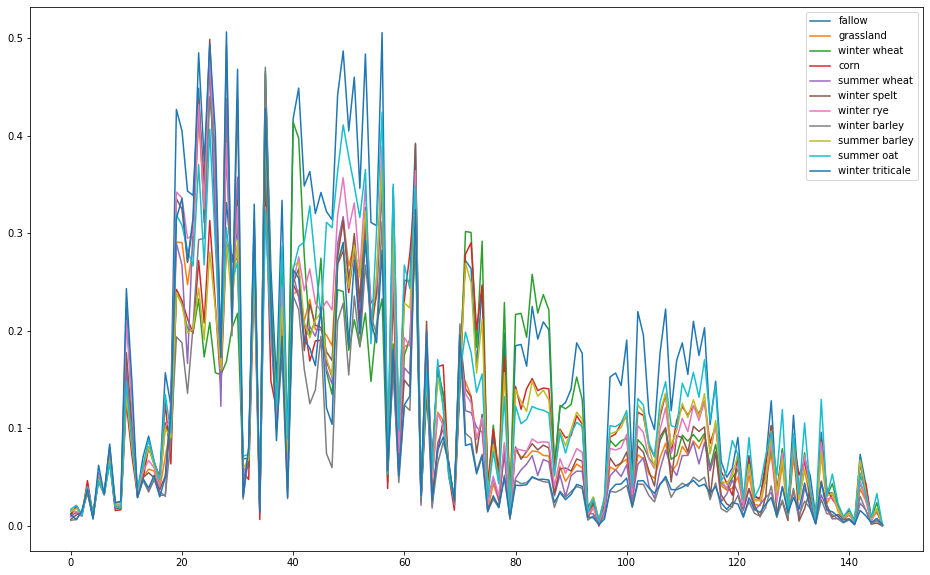

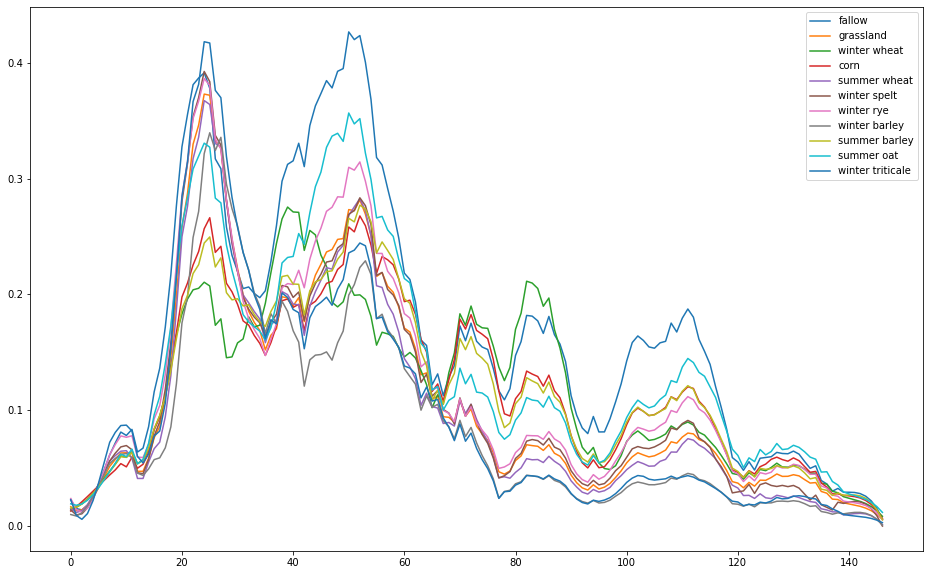

In [28]:
rawfig, rawax = plt.subplots(figsize = (16, 10))

smfig, smax   = plt.subplots(figsize = (16, 10))

classcols = {
    'fallow': 'red',
    'grassland': 'blue',
    'winter wheat': 'orange',
    'corn': 'purple',
    'summer wheat': 'gray',
    'winter spelt': 'green',
    'winter rye': 'pink',
    'winter barley': 'cyan',
    'summer barley': 'violet',
    'summer oat': 'black',
    'winter triticale': 'turquiose',
    'rapeseed': 'beige',
}

for profile in processedProfiles:
    # Plot raw and smoothed
    name = profile['name']
    raw  = profile['raw']
    smooth = profile['smoothed']
    
    rawax.plot(raw, label = name)
    smax.plot(smooth, label = name)
    
    
rawax.legend()
smax.legend()
plt.show()






Initializing BavarianCropsDataset train partition in holl
read 12 classes
precached dataset files found at S:/PhD Data/BavarianCrops\npy\classmapping12.csv\random\holl\train
loaded 27288 samples
Dataset S:/PhD Data/BavarianCrops. region holl. partition train. X:27288x(71, 13), y:(27288,) with 12 classes
CLASS:  tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1, -1])
float32
[-2.74437368e-02  

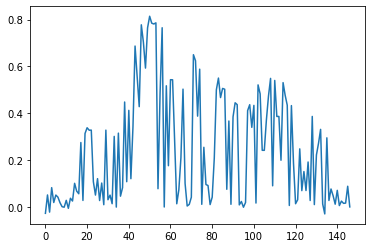

In [5]:



cropset = torch.utils.data.DataLoader(dataset=cropdata, batch_size= 10)



X, Y, IDX = next(iter(cropset))

tempProfile = X[5]

print("CLASS: ", Y[5])

# print("TP: ", tempProfile.shape) # 147, 13 (13 bands)
# ['B1', 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9']


# NDVI is B8 - B4 / B8 + B4


b8 = tempProfile[:, 10].numpy()
b4 = tempProfile[:, 6].numpy()

print(b8.dtype)

NDVI = (b8 - b4) / (b8 + b4)
print(NDVI)

fig, ax = plt.subplots()


plt.show()

Ideally, we need a modification to BCROPSDSET to get a specific class?